In [4]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [5]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

170508288/170498071 [==============================] - 11s 0us/step


In [6]:
X_train.shape

(50000, 32, 32, 3)

In [7]:
y_train.shape

(50000, 1)

In [8]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [9]:
y_train = y_train.reshape(-1,)

In [10]:
y_train.shape

(50000,)

In [11]:
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [12]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [13]:
def plot_sample(X, y, index):
    plt.figure(figsize=(15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

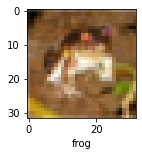

In [14]:
plot_sample(X_train, y_train, 0)

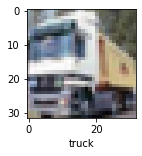

In [15]:
plot_sample(X_train, y_train, 1)

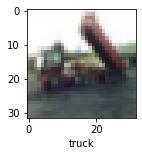

In [16]:
plot_sample(X_train, y_train, 2)

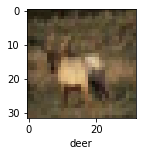

In [17]:
plot_sample(X_train, y_train, 3)

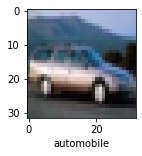

In [18]:
plot_sample(X_train, y_train, 4)

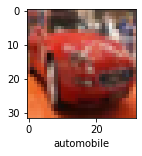

In [19]:
plot_sample(X_train, y_train, 5)

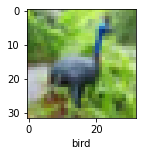

In [20]:
plot_sample(X_train, y_train, 6)

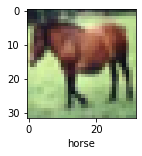

In [21]:
plot_sample(X_train, y_train, 7)

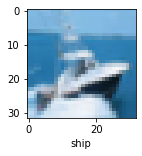

In [22]:
plot_sample(X_train, y_train, 8)

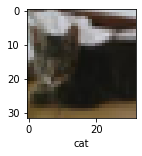

In [23]:
plot_sample(X_train, y_train, 9)

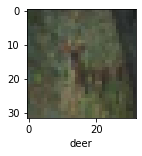

In [24]:
plot_sample(X_train, y_train, 10)

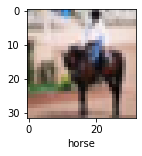

In [25]:

plot_sample(X_train, y_train, 11)

In [26]:
X_train = X_train/255
X_test = X_test/255

In [33]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation="relu"),
        layers.Dense(1000, activation="relu"),
        layers.Dense(10, activation="sigmoid")
    ])

ann.compile(optimizer="SGD",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 121s 77ms/step - loss: 1.8105 - accuracy: 0.3554
Epoch 2/5
1563/1563 [==============================] - 146s 94ms/step - loss: 1.6210 - accuracy: 0.4258
Epoch 3/5
1563/1563 [==============================] - 111s 71ms/step - loss: 1.5405 - accuracy: 0.4582
Epoch 4/5
1563/1563 [==============================] - 100s 64ms/step - loss: 1.4798 - accuracy: 0.4784
Epoch 5/5
1563/1563 [==============================] - 101s 65ms/step - loss: 1.4303 - accuracy: 0.4957


In [34]:
ann.evaluate(X_test, y_test)

313/313 [==============================] - 8s 26ms/step - loss: 1.4907 - accuracy: 0.4710


[1.4907294511795044, 0.47099998593330383]

In [35]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]


print("classification Report: \n", classification_report(y_test, y_pred_classes))

classification Report: 
               precision    recall  f1-score   support

           0       0.52      0.61      0.56      1000
           1       0.53      0.71      0.61      1000
           2       0.34      0.47      0.40      1000
           3       0.29      0.58      0.38      1000
           4       0.63      0.14      0.23      1000
           5       0.51      0.22      0.31      1000
           6       0.62      0.38      0.47      1000
           7       0.51      0.58      0.55      1000
           8       0.73      0.43      0.54      1000
           9       0.53      0.59      0.56      1000

    accuracy                           0.47     10000
   macro avg       0.52      0.47      0.46     10000
weighted avg       0.52      0.47      0.46     10000



In [37]:
cnn = models.Sequential([
        # cnn
        layers.Conv2D(filters=32, kernel_size=(3,3), activation="relu", input_shape=(32,32,3)),
        layers.MaxPooling2D((2,2)),

        layers.Conv2D(filters=64, kernel_size=(3,3), activation="relu"),
        layers.MaxPooling2D((2,2)),


        # dense
        layers.Flatten(),
        layers.Dense(64, activation="relu"),
        layers.Dense(10, activation="softmax")
    ])


In [39]:
cnn.compile(optimizer="adam",
                loss="sparse_categorical_crossentropy",
                metrics=["accuracy"])

In [40]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 73s 46ms/step - loss: 1.5036 - accuracy: 0.4558
Epoch 2/10
1563/1563 [==============================] - 63s 40ms/step - loss: 1.1427 - accuracy: 0.5997
Epoch 3/10
1563/1563 [==============================] - 65s 41ms/step - loss: 1.0004 - accuracy: 0.6551
Epoch 4/10
1563/1563 [==============================] - 64s 41ms/step - loss: 0.9171 - accuracy: 0.6819
Epoch 5/10
1563/1563 [==============================] - 62s 40ms/step - loss: 0.8567 - accuracy: 0.7032
Epoch 6/10
1563/1563 [==============================] - 62s 40ms/step - loss: 0.8051 - accuracy: 0.7188
Epoch 7/10
1563/1563 [==============================] - 63s 40ms/step - loss: 0.7513 - accuracy: 0.7401
Epoch 8/10
1563/1563 [==============================] - 62s 40ms/step - loss: 0.7118 - accuracy: 0.7538
Epoch 9/10
1563/1563 [==============================] - 63s 40ms/step - loss: 0.6758 - accuracy: 0.7645
Epoch 10/10
1563/1563 [==============================] - 62s 39m

In [42]:
cnn.evaluate(X_test, y_test)

313/313 [==============================] - 4s 13ms/step - loss: 0.9448 - accuracy: 0.6923


[0.9447906017303467, 0.692300021648407]

In [44]:
y_test = y_test.reshape(-1,)
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

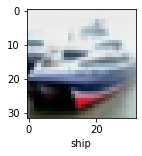

In [45]:

plot_sample(X_test, y_test, 1)

In [46]:
y_pred = cnn.predict(X_test)

In [47]:
y_pred[:5]

array([[4.3790508e-03, 8.6657179e-05, 5.2964414e-04, 9.4607890e-01,
        2.5732152e-04, 3.5920270e-02, 8.2704043e-03, 1.1263479e-04,
        3.9094929e-03, 4.5561028e-04],
       [3.8844807e-04, 2.9636468e-03, 4.6411049e-07, 5.4947309e-06,
        7.4334094e-09, 3.0942129e-08, 1.8352162e-08, 9.8146413e-10,
        9.9663734e-01, 4.4636031e-06],
       [2.1940714e-01, 3.7349093e-01, 1.6081475e-03, 1.5255263e-02,
        5.0361792e-04, 7.5188704e-04, 6.0566160e-04, 1.7966343e-03,
        3.7789831e-01, 8.6823646e-03],
       [9.4119149e-01, 4.2608343e-03, 4.1684834e-03, 2.9330540e-03,
        2.0339247e-03, 7.1962837e-05, 8.4637059e-04, 1.4173897e-04,
        4.4138975e-02, 2.1317166e-04],
       [2.0352758e-04, 1.8040781e-04, 6.2234037e-02, 1.2615818e-01,
        4.1905832e-01, 1.9347265e-02, 3.7273544e-01, 2.5082007e-05,
        3.9175691e-05, 1.8550290e-05]], dtype=float32)

In [51]:
y_classes =[np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 0, 4]

In [52]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

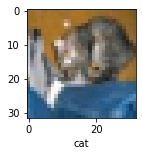

In [54]:
plot_sample(X_test, y_test, 0)

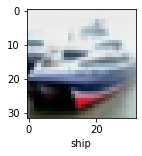

In [55]:
plot_sample(X_test, y_test, 1)

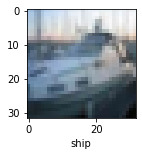

In [56]:
plot_sample(X_test, y_test, 2)

In [57]:
classes[y_classes[3]]

'airplane'

In [59]:
classes[y_classes[4]]

'deer'

In [60]:
classes[y_classes[5]]

'frog'

In [61]:
classes[y_classes[6]]

'automobile'

In [58]:
print("classification Report: \n", classification_report(y_test, y_classes))

classification Report: 
               precision    recall  f1-score   support

           0       0.68      0.78      0.72      1000
           1       0.85      0.78      0.81      1000
           2       0.54      0.61      0.57      1000
           3       0.54      0.45      0.49      1000
           4       0.75      0.51      0.60      1000
           5       0.61      0.61      0.61      1000
           6       0.69      0.83      0.76      1000
           7       0.73      0.75      0.74      1000
           8       0.73      0.86      0.79      1000
           9       0.84      0.75      0.79      1000

    accuracy                           0.69     10000
   macro avg       0.70      0.69      0.69     10000
weighted avg       0.70      0.69      0.69     10000

